# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

608

In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=bb022467b5f4f48840f751f987d9c29a&units=imperial&q='

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Set up dictionary to hold reponse info
cities_data = []

# Print to screen Data Retrieval
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Initialize counters for city number and sets of 50 cities
page_set = 1
cities_in_set = 0

# Loop through the list of cities and perform a request for data on each
for city in cities:
    try:
        response = requests.get(query_url+city).json()
        # Change Set & reset the list of cities in set
        if (cities_in_set % 50 == 0):
            cities_in_set = 0
            page_set += 1
        print(f"Processing Record {cities_in_set} of Set {page_set} | {city}")
        cities_data.append({
            "City": city,
            "Lat": response['coord']['lat'],
            "Lng": response['coord']['lon'],
            "Max Temp": response['main']['temp'],
            "Humidity": response['main']['humidity'],
            "Cloudiness": response['clouds']['all'],
            "Wind Speed": response['wind']['speed'],
            "Country": response['sys']['country'],
            "Date": response['dt']
            })
    except:
        print("City not found. Skipping...")
        pass
    cities_in_set += 1

# End Data Retrieval

print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bredasdorp
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | vao
Processing Record 4 of Set 1 | finschhafen
Processing Record 5 of Set 1 | arraial do cabo
Processing Record 6 of Set 1 | tuktoyaktuk
Processing Record 7 of Set 1 | salalah
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | thompson
Processing Record 10 of Set 1 | hami
Processing Record 11 of Set 1 | new norfolk
Processing Record 12 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 13 of Set 1 | butaritari
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | bambous virieux
Processing Record 16 of Set 1 | bluff
Processing Record 17 of Set 1 | chuy
Processing Record 18 of Set 1 | yellowknife
Processing Record 19 of Set 1 | chokurdakh
Processing Record 20 of Set 1 | rikitea
Processing Record 21 of Set 1 | kodiak
Processing Record 22 of Set 1 | hobart
Process

Processing Record 42 of Set 4 | paranaiba
Processing Record 43 of Set 4 | karpogory
Processing Record 44 of Set 4 | beyneu
Processing Record 45 of Set 4 | caravelas
Processing Record 46 of Set 4 | aykhal
Processing Record 47 of Set 4 | atasu
Processing Record 48 of Set 4 | winnemucca
Processing Record 49 of Set 4 | kovernino
Processing Record 1 of Set 5 | natal
Processing Record 2 of Set 5 | balsas
Processing Record 3 of Set 5 | segou
Processing Record 4 of Set 5 | nanortalik
Processing Record 5 of Set 5 | fairbanks
Processing Record 6 of Set 5 | norman wells
Processing Record 7 of Set 5 | katangli
Processing Record 8 of Set 5 | ozernovskiy
Processing Record 9 of Set 5 | khatanga
Processing Record 10 of Set 5 | kuttanallur
City not found. Skipping...
Processing Record 11 of Set 5 | stykkisholmur
Processing Record 12 of Set 5 | korla
Processing Record 13 of Set 5 | yar-sale
Processing Record 14 of Set 5 | poplar bluff
Processing Record 15 of Set 5 | deniliquin
Processing Record 16 of Se

Processing Record 36 of Set 8 | port hardy
Processing Record 37 of Set 8 | juifang
City not found. Skipping...
Processing Record 38 of Set 8 | carutapera
Processing Record 39 of Set 8 | mount gambier
Processing Record 40 of Set 8 | fortuna
Processing Record 41 of Set 8 | vanavara
Processing Record 42 of Set 8 | northam
Processing Record 43 of Set 8 | karratha
Processing Record 44 of Set 8 | grindavik
Processing Record 45 of Set 8 | kungurtug
Processing Record 46 of Set 8 | osa
Processing Record 47 of Set 8 | griffith
Processing Record 48 of Set 8 | siderno
Processing Record 49 of Set 8 | isoka
Processing Record 1 of Set 9 | kyra
Processing Record 2 of Set 9 | trairi
Processing Record 3 of Set 9 | assiniboia
Processing Record 4 of Set 9 | asau
Processing Record 5 of Set 9 | bonthe
Processing Record 6 of Set 9 | lerwick
Processing Record 7 of Set 9 | green river
Processing Record 8 of Set 9 | sao joao da barra
Processing Record 9 of Set 9 | andevoranto
City not found. Skipping...
Process

Processing Record 23 of Set 12 | moose factory
Processing Record 24 of Set 12 | ippy
Processing Record 25 of Set 12 | mocambique
City not found. Skipping...
Processing Record 26 of Set 12 | saraza
Processing Record 27 of Set 12 | mocuba
Processing Record 28 of Set 12 | oranjemund
Processing Record 29 of Set 12 | barra do garcas
Processing Record 30 of Set 12 | yingzhong
City not found. Skipping...
Processing Record 31 of Set 12 | zyryanka
Processing Record 32 of Set 12 | ponta do sol
Processing Record 33 of Set 12 | chik
Processing Record 34 of Set 12 | staryy nadym
Processing Record 35 of Set 12 | rawson
Processing Record 36 of Set 12 | chernitsyno
Processing Record 37 of Set 12 | aksha
Processing Record 38 of Set 12 | haibowan
City not found. Skipping...
Processing Record 39 of Set 12 | champerico
Processing Record 40 of Set 12 | tikamgarh
Processing Record 41 of Set 12 | tabou
Processing Record 42 of Set 12 | sisimiut
Processing Record 43 of Set 12 | opuwo
Processing Record 44 of Se

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
cities_data_pd = pd.DataFrame(cities_data)

# Export the City_Data into a csv
cities_data_pd.to_csv(output_data_file)

# Show Record Count
cities_data_pd.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bredasdorp,-34.5322,20.0403,69.80,83,59,6.91,ZA,1613193623
1,punta arenas,-53.1500,-70.9167,53.29,66,90,18.41,CL,1613193623
2,vao,-22.6667,167.4833,79.66,74,15,7.65,NC,1613193624
3,finschhafen,-6.6024,147.8681,85.42,70,85,8.01,PG,1613193624
4,arraial do cabo,-22.9661,-42.0278,75.58,88,100,13.91,BR,1613193625


In [6]:
cities_data_pd.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,5.530000e+02
mean,19.280897,13.335119,48.744973,74.560579,51.839060,7.826383,1.613194e+09
std,33.818939,91.191877,33.162948,18.866245,39.737469,5.942867,8.623403e+01
min,-54.800000,-175.200000,-38.200000,16.000000,0.000000,0.130000,1.613193e+09
25%,-9.106100,-68.514500,25.030000,67.000000,4.000000,3.580000,1.613194e+09
50%,21.461200,17.944200,61.540000,78.000000,59.000000,5.990000,1.613194e+09
75%,48.649900,92.050000,75.200000,88.000000,90.000000,10.360000,1.613194e+09
max,78.218600,178.416700,98.600000,100.000000,100.000000,41.430000,1.613194e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
hum_max = cities_data_pd['Humidity'].max()
hum_max

100

In [8]:
#  Get the indices of cities that have humidity over 100%.
hum_over_100 = cities_data_pd.loc[cities_data_pd['Humidity']>100, :] 
hum_over_100.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = cities_data_pd

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

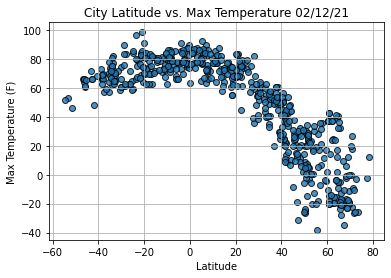

In [10]:
plt.scatter(cities_data_pd["Lat"], cities_data_pd["Max Temp"], marker="o", alpha=0.8, edgecolors="black")
plt.title("City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save plot
plt.savefig("City Latitude vs. Max Temperature.png")

# Show plot
plt.show()

### ANALYSIS PLOT 1: Latitude vs. Temperature 
- The cities near to the Ecuator (Latitude 0) have warm temperature between 60 to over 80 (F).
- For this time of the year (February) we see that the southern hemisphere also has a warm temperature as it is summer season.

## Latitude vs. Humidity Plot

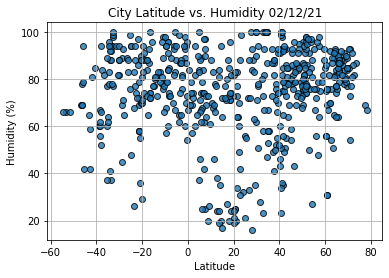

In [11]:
plt.scatter(cities_data_pd["Lat"], cities_data_pd["Humidity"], marker="o", alpha=0.8, edgecolors="black")
plt.title("City Latitude vs. Humidity " + time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save plot
plt.savefig("City Latitude vs. Humidity.png")

# Show plot
plt.show()

### ANALYSIS PLOT 2: Latitude vs. Humidity
- As of February, this plot suggest that there is more humidity in the cities at the north hemisphere between latitude 60-80.

## Latitude vs. Cloudiness Plot

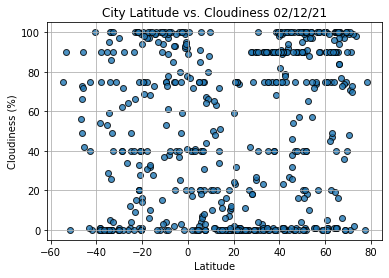

In [12]:
plt.scatter(cities_data_pd["Lat"], cities_data_pd["Cloudiness"], marker="o", alpha=0.8, edgecolors="black")
plt.title("City Latitude vs. Cloudiness " + time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save plot
plt.savefig("City Latitude vs. Cloudiness.png")

# Show plot
plt.show()

### ANALYSIS PLOT 3: Latitude vs. Cloudiness
- As of February, there is no clear relation between latitude and clouds.

## Latitude vs. Wind Speed Plot

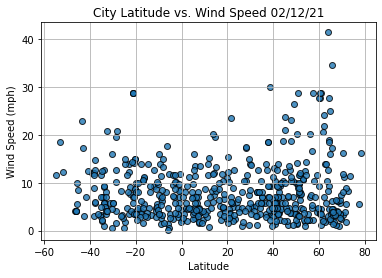

In [13]:
plt.scatter(cities_data_pd["Lat"], cities_data_pd["Wind Speed"], marker="o", alpha=0.8, edgecolors="black")
plt.title("City Latitude vs. Wind Speed " + time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save plot
plt.savefig("City Latitude vs. Wind Speed.png")

# Show plot
plt.show()

### ANALYSIS PLOT 4: Latitude vs. Wind Spreed
- As of February, this plot suggest that strongest winds happen in the cities at the north hemisphere between latitude 40-80.

## Linear Regression

In [14]:
# Create datasets for hemisphere (latitude >= 0 belongs to Northern, latitude < 0 belongs to Southern
northern_df = cities_data_pd.loc[cities_data_pd['Lat'] >= 0, :] 
southern_df = cities_data_pd.loc[cities_data_pd['Lat'] < 0, :]
southern_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bredasdorp,-34.5322,20.0403,69.80,83,59,6.91,ZA,1613193623
1,punta arenas,-53.1500,-70.9167,53.29,66,90,18.41,CL,1613193623
2,vao,-22.6667,167.4833,79.66,74,15,7.65,NC,1613193624
3,finschhafen,-6.6024,147.8681,85.42,70,85,8.01,PG,1613193624
4,arraial do cabo,-22.9661,-42.0278,75.58,88,100,13.91,BR,1613193625


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7702752373244363


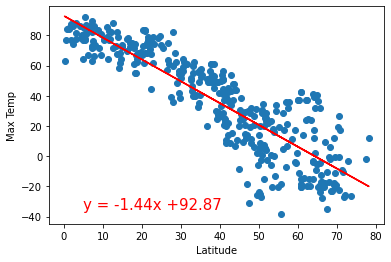

In [28]:
n_x_values = northern_df['Lat']
n_y_values = northern_df['Max Temp']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(n_x_values, n_y_values)

# Get regression values
regress_values = n_x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# Create Plot
plt.scatter(n_x_values,n_y_values)
plt.plot(n_x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(5,-35),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.30896566568393447


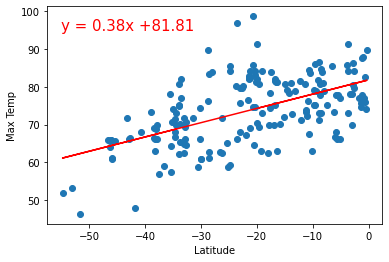

In [29]:
s_x_values = southern_df['Lat']
s_y_values = southern_df['Max Temp']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(s_x_values, s_y_values)

# Get regression values
regress_values = s_x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# Create Plot
plt.scatter(s_x_values,s_y_values)
plt.plot(s_x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq, (-55,95),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

### ANALYSIS PLOTS 1 - 2: Latitude vs. Max Temp (%)
- The regression line in the norther hemisphere predict low temperature as we go north in the hemisphere due to the winter season.
- On the contrary, the southern hemisphere predict high temperature having a minimum of 60°F due to the summer season.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.08549984592219073


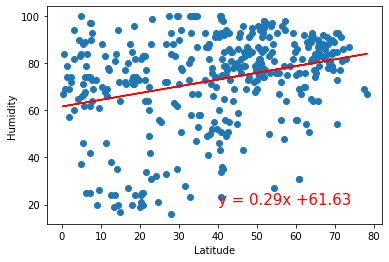

In [31]:
n_x_values = northern_df['Lat']
n_y_values = northern_df['Humidity']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(n_x_values, n_y_values)

# Get regression values
regress_values = n_x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# Create Plot
plt.scatter(n_x_values,n_y_values)
plt.plot(n_x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(40,20),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.047108321929065465


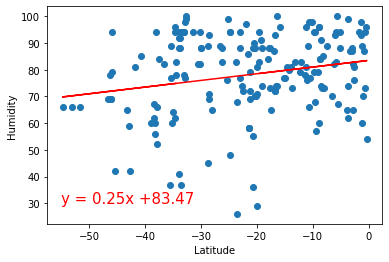

In [33]:
s_x_values = southern_df['Lat']
s_y_values = southern_df['Humidity']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(s_x_values, s_y_values)

# Get regression values
regress_values = s_x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# Create Plot
plt.scatter(s_x_values,s_y_values)
plt.plot(s_x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq, (-55,30),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

### ANALYSIS PLOTS 3 - 4: Latitude vs. Humidity (%)
- The regression line in both hemisphere predict a high humidity value as we go north in the hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.12627106016236475


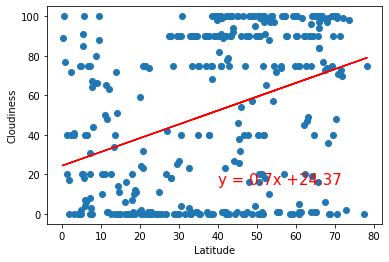

In [35]:
n_x_values = northern_df['Lat']
n_y_values = northern_df['Cloudiness']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(n_x_values, n_y_values)

# Get regression values
regress_values = n_x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# Create Plot
plt.scatter(n_x_values,n_y_values)
plt.plot(n_x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(40,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.06562116281506579


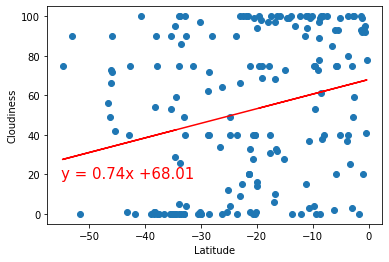

In [37]:
s_x_values = southern_df['Lat']
s_y_values = southern_df['Cloudiness']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(s_x_values, s_y_values)

# Get regression values
regress_values = s_x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# Create Plot
plt.scatter(s_x_values,s_y_values)
plt.plot(s_x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq, (-55,18),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

### ANALYSIS PLOTS 5 - 6: Latitude vs. Cloudiness (%)
- The regression line shown in both hemispheres shows a tendency to predict a high cloudiness value as we go north.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.020500642545605265


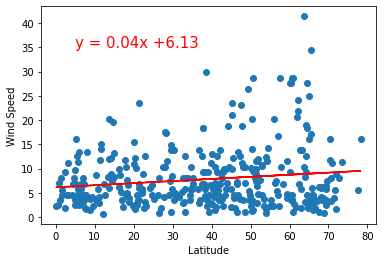

In [39]:
n_x_values = northern_df['Lat']
n_y_values = northern_df['Wind Speed']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(n_x_values, n_y_values)

# Get regression values
regress_values = n_x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# Create Plot
plt.scatter(n_x_values,n_y_values)
plt.plot(n_x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(5,35),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.014550669411741457


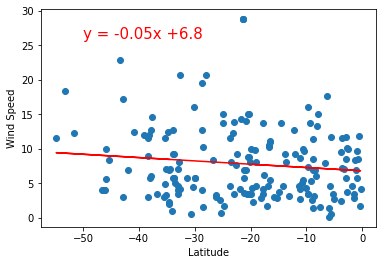

In [42]:
s_x_values = southern_df['Lat']
s_y_values = southern_df['Wind Speed']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(s_x_values, s_y_values)

# Get regression values
regress_values = s_x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# Create Plot
plt.scatter(s_x_values,s_y_values)
plt.plot(s_x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq, (-50,26),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

### ANALYSIS PLOTS 7 - 8: Latitude vs. Wind Spreed
- As of February, the cities at the northern hemisphere have strongest winds reaching a maximum wind speed over 40 (mph)
- Most of the cities in the southern hemisphere have wind speed around 10 (mph) and the regression line predict a wind speed below 10 (mph)

### As a bonus, try to create a function that will create these charts based on different parameters.

In [97]:
# BONUS

def hemisphere_func(hemisphere_df, hname):
    """Function that takes an the hemisphere name & dataframe and save 4 linear regression plots"""
    
    y_var_list = ["Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
    
    for y_var in y_var_list:
        x_values = hemisphere_df['Lat']
        y_values = hemisphere_df[y_var]
        
        # Perform a linear regression on temperature vs. latitude
        (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
        
        # Get regression values
        regress_values = x_values * slope + intercept
        line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
        
        # Create Plot
        plt.scatter(x_values,y_values)
        plt.plot(x_values,regress_values,"r-")

        # Label plot and annotate the line equation
        plt.title("City Latitude vs. " + y_var + " " + time.strftime("%x"))
        plt.xlabel('Latitude')
        plt.ylabel(y_var)
        plt.grid(True)
        plt.annotate(line_eq, fontsize=10, color="red", xy=(.025, .975), xycoords='figure fraction', horizontalalignment='left', verticalalignment='top')

        # Print r value
        message = (f"The r-value is: {rvalue**2}")
        filename = (f"{hname}_{y_var}.jpg")
        plt.savefig(filename, dpi=300, bbox_inches='tight')
        plt.close()

In [98]:
hemisphere_func(southern_df, 'south')

In [99]:
hemisphere_func(northern_df, 'north')